In [1]:
#Libraries
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max.columns", 25)

In [2]:
df = pd.read_csv("telco.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#Number of unique values of each columns
for i in df.columns:
    print(f"{i} column has *{df[i].nunique()}* unique values.")

customerID column has *7043* unique values.
gender column has *2* unique values.
SeniorCitizen column has *2* unique values.
Partner column has *2* unique values.
Dependents column has *2* unique values.
tenure column has *73* unique values.
PhoneService column has *2* unique values.
MultipleLines column has *3* unique values.
InternetService column has *3* unique values.
OnlineSecurity column has *3* unique values.
OnlineBackup column has *3* unique values.
DeviceProtection column has *3* unique values.
TechSupport column has *3* unique values.
StreamingTV column has *3* unique values.
StreamingMovies column has *3* unique values.
Contract column has *3* unique values.
PaperlessBilling column has *2* unique values.
PaymentMethod column has *4* unique values.
MonthlyCharges column has *1585* unique values.
TotalCharges column has *6531* unique values.
Churn column has *2* unique values.


##### Gender

In [8]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

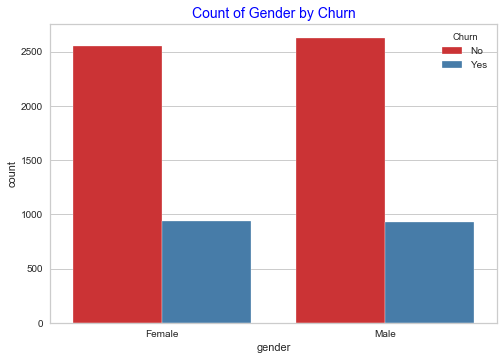

In [9]:
sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Count of Gender by Churn", c="Blue", size=14);

##### Senior Citizen

In [10]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

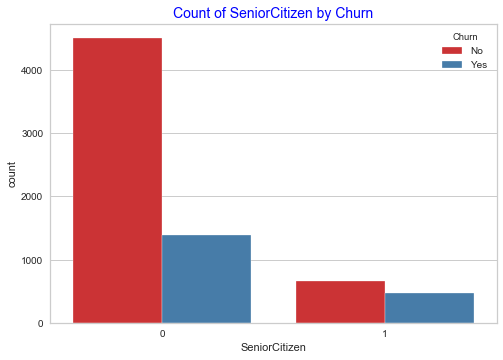

In [11]:
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Count of SeniorCitizen by Churn", c="Blue", size=14);

##### Partner

In [12]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

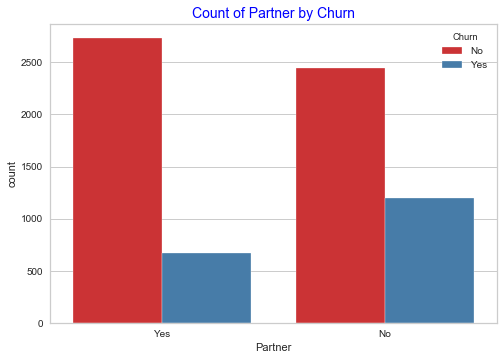

In [13]:
sns.countplot(x="Partner", hue="Churn", data=df)
plt.title("Count of Partner by Churn", c="Blue", size=14);

##### Dependents

In [14]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

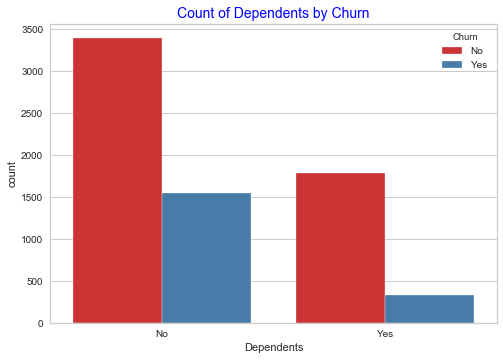

In [15]:
sns.countplot(x="Dependents", hue="Churn", data=df)
plt.title("Count of Dependents by Churn", c="Blue", size=14);

In [16]:
df.groupby("Dependents")["Churn"].value_counts(normalize=True)

Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
Name: Churn, dtype: float64

##### Tenure

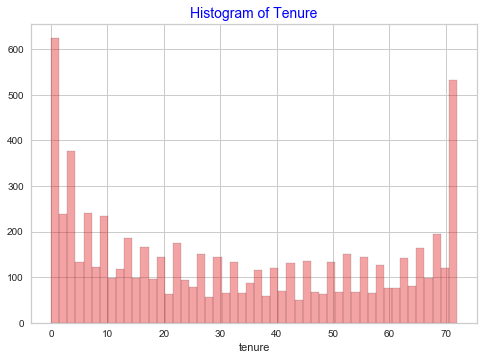

In [17]:
sns.distplot(df["tenure"], bins=50, kde=False, hist_kws={"edgecolor":"black"})
plt.title("Histogram of Tenure", c="blue", size=14);

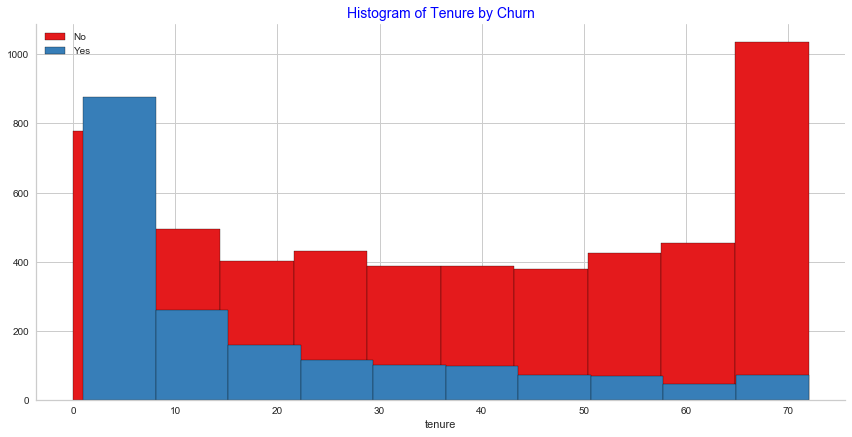

In [18]:
g = sns.FacetGrid(df, hue="Churn", height=6, aspect=2)
g.map(plt.hist, "tenure",edgecolor="black")
plt.title("Histogram of Tenure by Churn", c="Blue", size=14);
plt.legend()

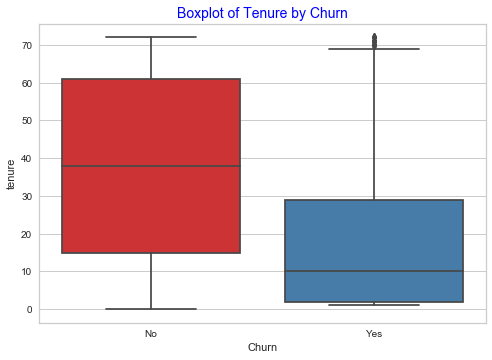

In [19]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Boxplot of Tenure by Churn", c="Blue", size=14);

##### Phone Service

In [20]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

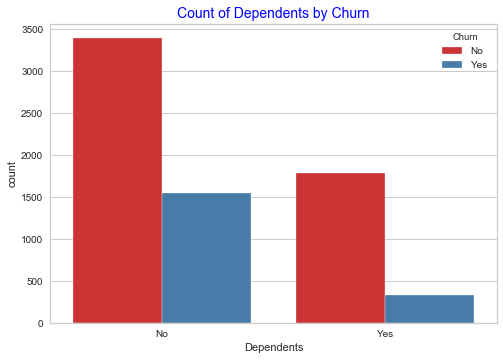

In [21]:
sns.countplot(x="Dependents", hue="Churn", data=df)
plt.title("Count of Dependents by Churn", c="Blue", size=14);

##### Multiple Lines

In [22]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

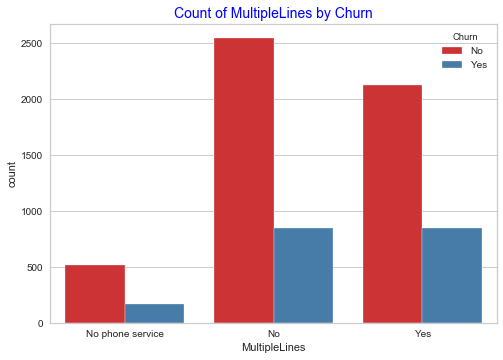

In [23]:
sns.countplot(x="MultipleLines", data=df, hue="Churn")
plt.title("Count of MultipleLines by Churn", c="Blue", size=14);

In [24]:
df.groupby("MultipleLines")["Churn"].value_counts(normalize=True)

MultipleLines     Churn
No                No       0.749558
                  Yes      0.250442
No phone service  No       0.750733
                  Yes      0.249267
Yes               No       0.713901
                  Yes      0.286099
Name: Churn, dtype: float64

##### Internet Service

In [25]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

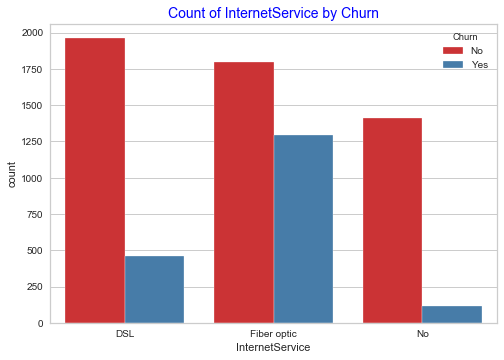

In [26]:
sns.countplot(x="InternetService", data=df, hue="Churn")
plt.title("Count of InternetService by Churn", c="Blue", size=14);

##### Online Security

In [27]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

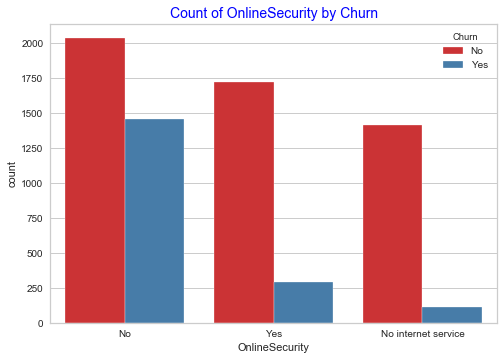

In [28]:
sns.countplot(x="OnlineSecurity", data=df, hue="Churn")
plt.title("Count of OnlineSecurity by Churn", c="Blue", size=14);

##### Online Backup

In [29]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

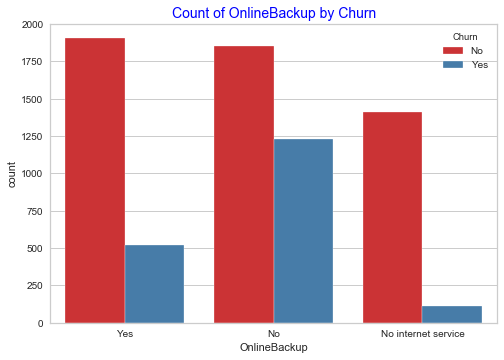

In [30]:
sns.countplot(x="OnlineBackup", data=df, hue="Churn")
plt.title("Count of OnlineBackup by Churn", c="Blue", size=14);

##### Device Protection

In [31]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

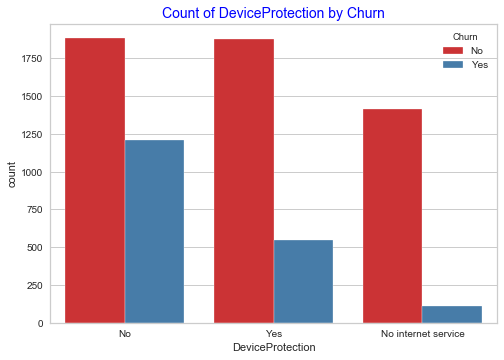

In [32]:
sns.countplot(x="DeviceProtection", data=df, hue="Churn")
plt.title("Count of DeviceProtection by Churn", c="Blue", size=14);

##### Tech Support

In [33]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

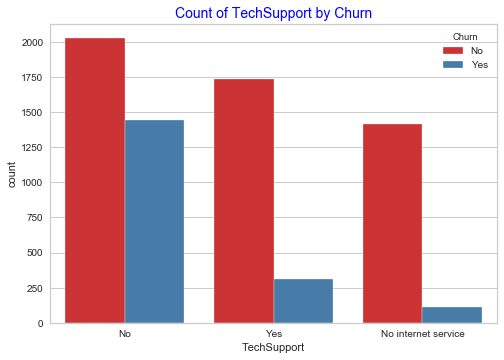

In [34]:
sns.countplot(x="TechSupport", data=df, hue="Churn")
plt.title("Count of TechSupport by Churn", c="Blue", size=14);

##### Streaming TV

In [35]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

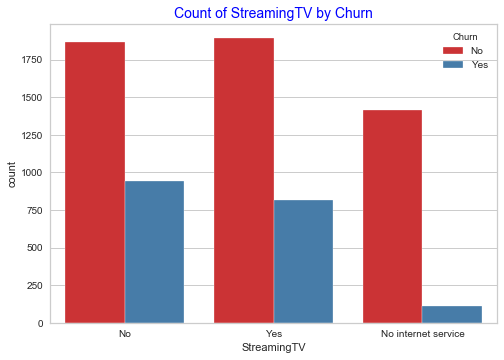

In [36]:
sns.countplot(x="StreamingTV", data=df, hue="Churn")
plt.title("Count of StreamingTV by Churn", c="Blue", size=14);

In [37]:
df.groupby("StreamingTV")["Churn"].value_counts(normalize=True)

StreamingTV          Churn
No                   No       0.664769
                     Yes      0.335231
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.699298
                     Yes      0.300702
Name: Churn, dtype: float64

##### Streaming Movies

In [38]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

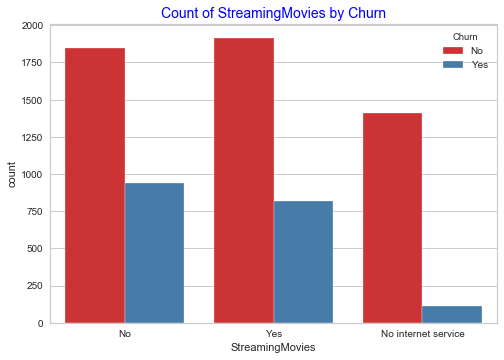

In [39]:
sns.countplot(x="StreamingMovies", data=df, hue="Churn")
plt.title("Count of StreamingMovies by Churn", c="Blue", size=14);

In [40]:
df.groupby("StreamingMovies")["Churn"].value_counts(normalize=True)

StreamingMovies      Churn
No                   No       0.663196
                     Yes      0.336804
No internet service  No       0.925950
                     Yes      0.074050
Yes                  No       0.700586
                     Yes      0.299414
Name: Churn, dtype: float64

##### Contract

In [41]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

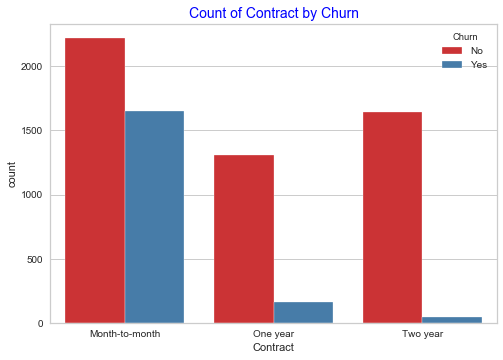

In [42]:
sns.countplot(x="Contract", data=df, hue="Churn")
plt.title("Count of Contract by Churn", c="Blue", size=14);

In [43]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: Churn, dtype: float64

##### Paperless Billing

In [44]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

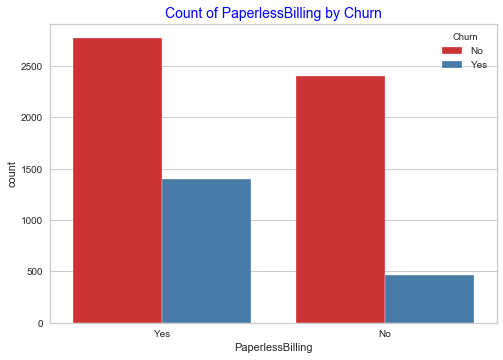

In [45]:
sns.countplot(x="PaperlessBilling", data=df, hue="Churn")
plt.title("Count of PaperlessBilling by Churn", c="Blue", size=14);

##### Payment Method

In [46]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

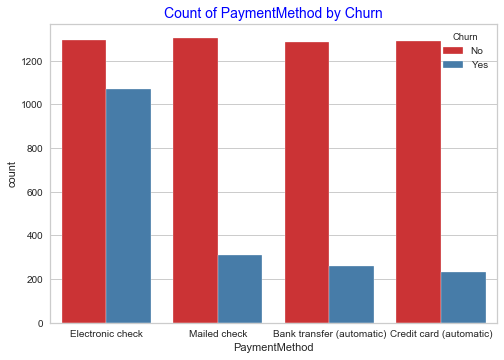

In [47]:
sns.countplot(x="PaymentMethod", data=df, hue="Churn")
plt.title("Count of PaymentMethod by Churn", c="Blue", size=14);

In [48]:
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: Churn, dtype: float64

##### Mountly Charges

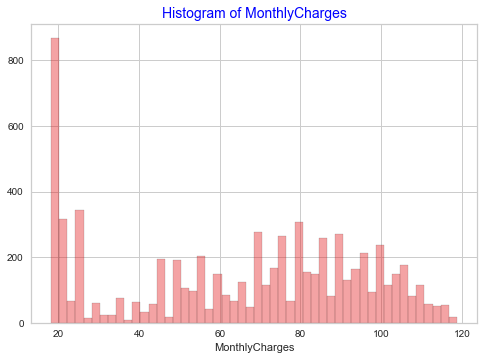

In [49]:
sns.distplot(df["MonthlyCharges"], bins=50, kde=False, hist_kws={"edgecolor":"black"})
plt.title("Histogram of MonthlyCharges", c="Blue", size=14);

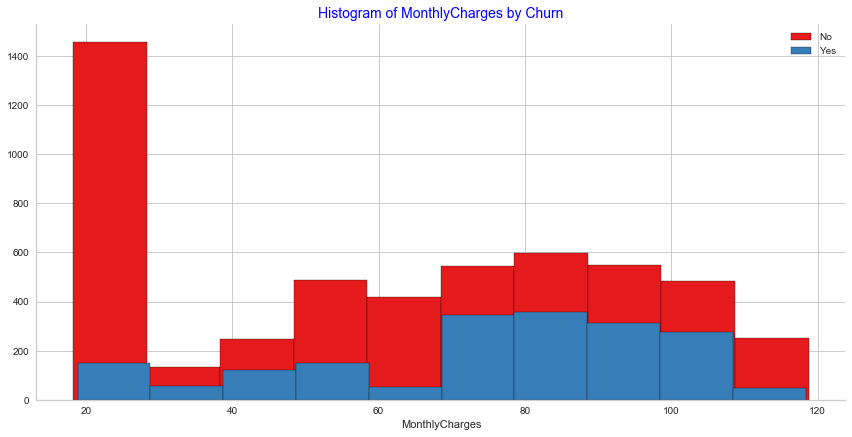

In [50]:
g = sns.FacetGrid(df, hue="Churn", height=6, aspect=2)
g.map(plt.hist, "MonthlyCharges",edgecolor="black")
plt.title("Histogram of MonthlyCharges by Churn", c="Blue", size=14);
plt.legend();

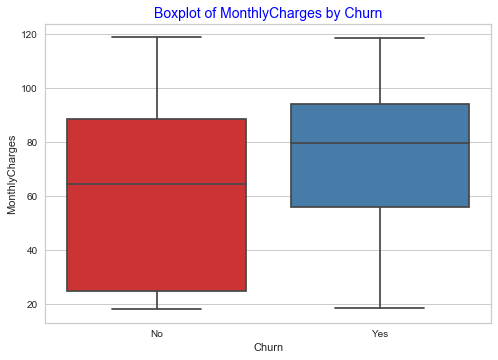

In [51]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Boxplot of MonthlyCharges by Churn", c="Blue", size=14);

##### Total Charges

In [52]:
df["TotalCharges"].dtype

dtype('O')

In [53]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
2790.65     1
1740.8      1
416.4       1
1592.35     1
3846.75     1
Name: TotalCharges, Length: 6531, dtype: int64

In [54]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: np.nan if x==" " else x)

In [55]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [56]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [57]:
# NaN values has 0 tenure. It clarifies that these people are new customers. Their total charges will be 0.
null_rows = df[df["TotalCharges"].isnull()].index
for i in null_rows:
    df.loc[i, "TotalCharges"] = 0

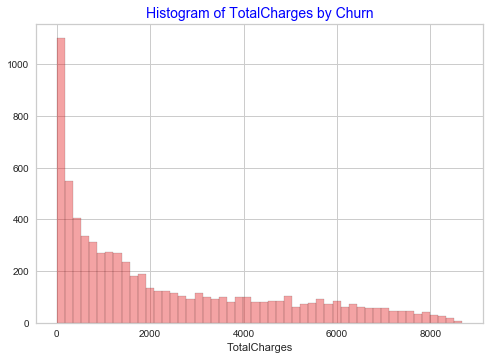

In [58]:
sns.distplot(df["TotalCharges"], bins=50, kde=False, hist_kws={"edgecolor":"black"})
plt.title("Histogram of TotalCharges", c="Blue", size=14);

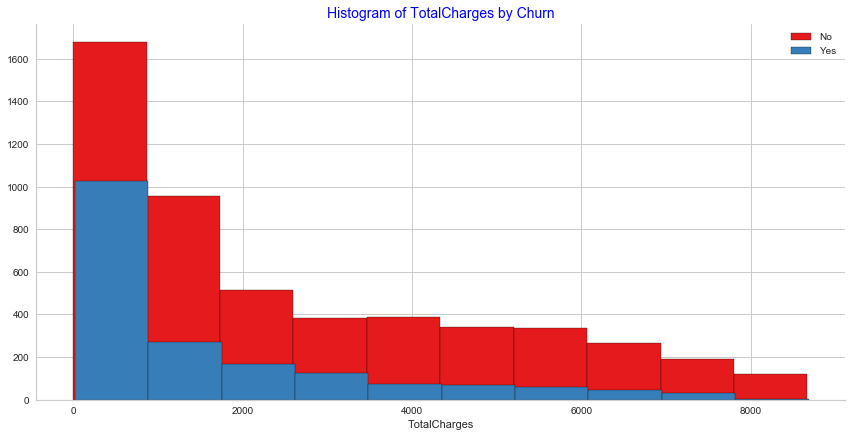

In [59]:
g = sns.FacetGrid(df, hue="Churn", height=6, aspect=2)
g.map(plt.hist, "TotalCharges",edgecolor="black")
plt.title("Histogram of TotalCharges by Churn", c="Blue", size=14);
plt.legend();

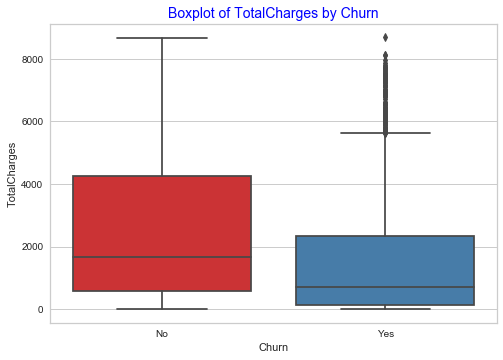

In [60]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Boxplot of TotalCharges by Churn", c="Blue", size=14);

##### Churn

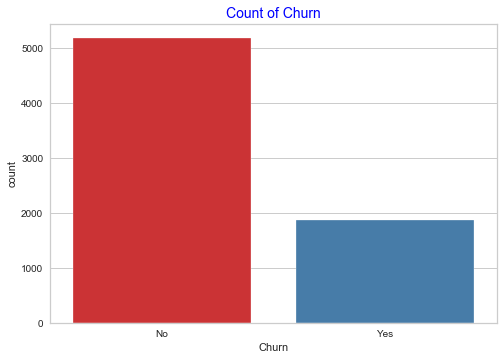

In [61]:
sns.countplot(df["Churn"])
plt.title("Count of Churn", c="Blue", size=14);

In [62]:
df["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

##### New Feature - Over Bill

In [63]:
# Some customers have more total charges than multipling of their tenure and monthly charges.
# This can be helpful in machine learning.

df["OverBill"] = [1  if (df.loc[i, "tenure"] * df.loc[i,"MonthlyCharges"] < df.loc[i,"TotalCharges"]) else 0 for i in range(df.shape[0])]

In [64]:
df["OverBill"].value_counts(normalize=True)

0    0.54508
1    0.45492
Name: OverBill, dtype: float64

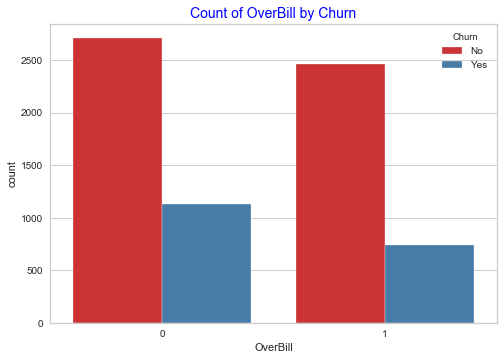

In [65]:
sns.countplot(x="OverBill", hue="Churn", data=df)
plt.title("Count of OverBill by Churn", c="Blue", size=14);

# Conclusion From EDA

1) Senior citizen customers have significant churn rate.

2) Churn mostly happened with less tenure.

3) Churn rate is much higher in fiber optic internet service users.

4) Customers who have month to month contract have higher churn rate.

5) Customers who use electronic check as payment method have high churn rate.

## Feature Selection

##### Drop Columns

In [66]:
df.drop("customerID", axis=1, inplace=True)

In [67]:
df.shape

(7043, 21)

##### Dummy Variables

In [68]:
churn = pd.get_dummies(df, drop_first=True)

In [69]:
churn.shape

(7043, 32)

In [70]:
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,OverBill,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1,0,1


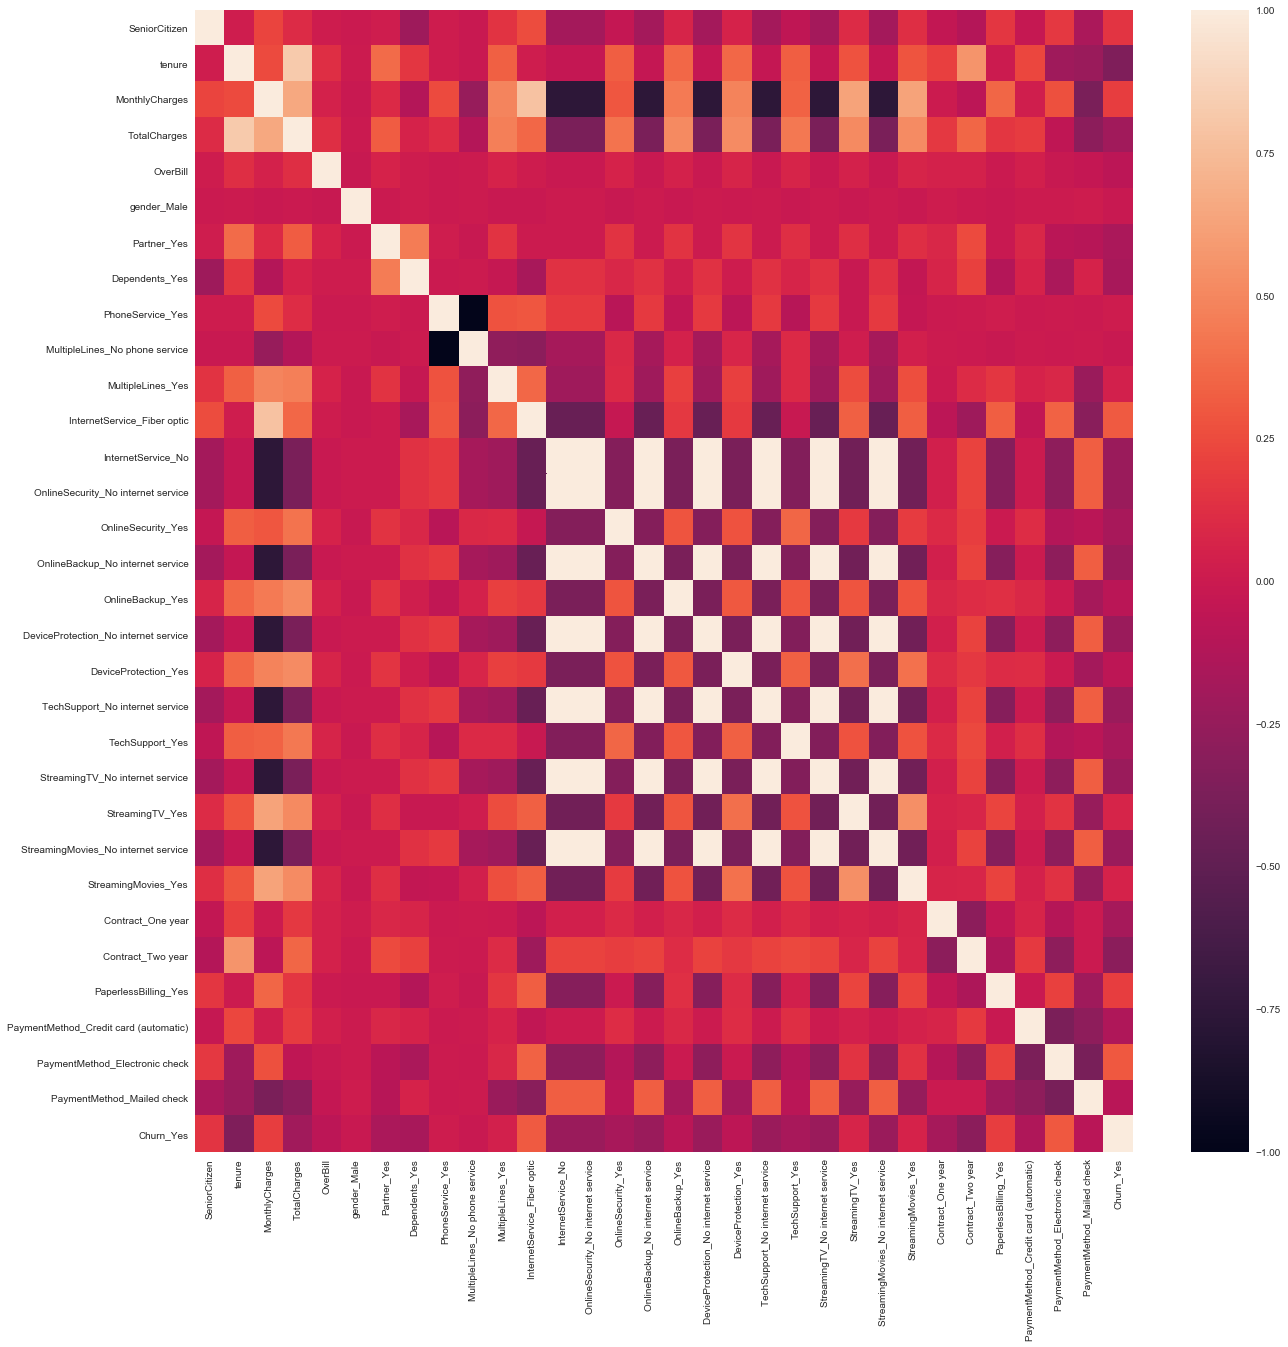

In [71]:
plt.figure(figsize=(21, 21))
sns.heatmap(churn.corr());

In [72]:
churn.corr()["InternetService_No"].sort_values(ascending=False)

OnlineBackup_No internet service         1.000000
StreamingMovies_No internet service      1.000000
DeviceProtection_No internet service     1.000000
TechSupport_No internet service          1.000000
StreamingTV_No internet service          1.000000
OnlineSecurity_No internet service       1.000000
InternetService_No                       1.000000
PaymentMethod_Mailed check               0.321361
Contract_Two year                        0.218278
PhoneService_Yes                         0.172209
Dependents_Yes                           0.139812
Contract_One year                        0.038004
gender_Male                              0.006026
PaymentMethod_Credit card (automatic)    0.001030
Partner_Yes                              0.000615
OverBill                                -0.014678
tenure                                  -0.039062
MultipleLines_No phone service          -0.172209
SeniorCitizen                           -0.182742
MultipleLines_Yes                       -0.210564


In [73]:
# InternetService_No has 1.0 correlation with OnlineBackup_No internet service, StreamingMovies_No internet service,
# DeviceProtection_No internet service, TechSupport_No internet service, StreamingTV_No internet service, 
# OnlineSecurity_No internet service columns. This situation can cause multicollinearity.

churn.drop(["OnlineBackup_No internet service", "StreamingMovies_No internet service", "DeviceProtection_No internet service",
            "TechSupport_No internet service", "StreamingTV_No internet service", "OnlineSecurity_No internet service"], axis=1, inplace=True)

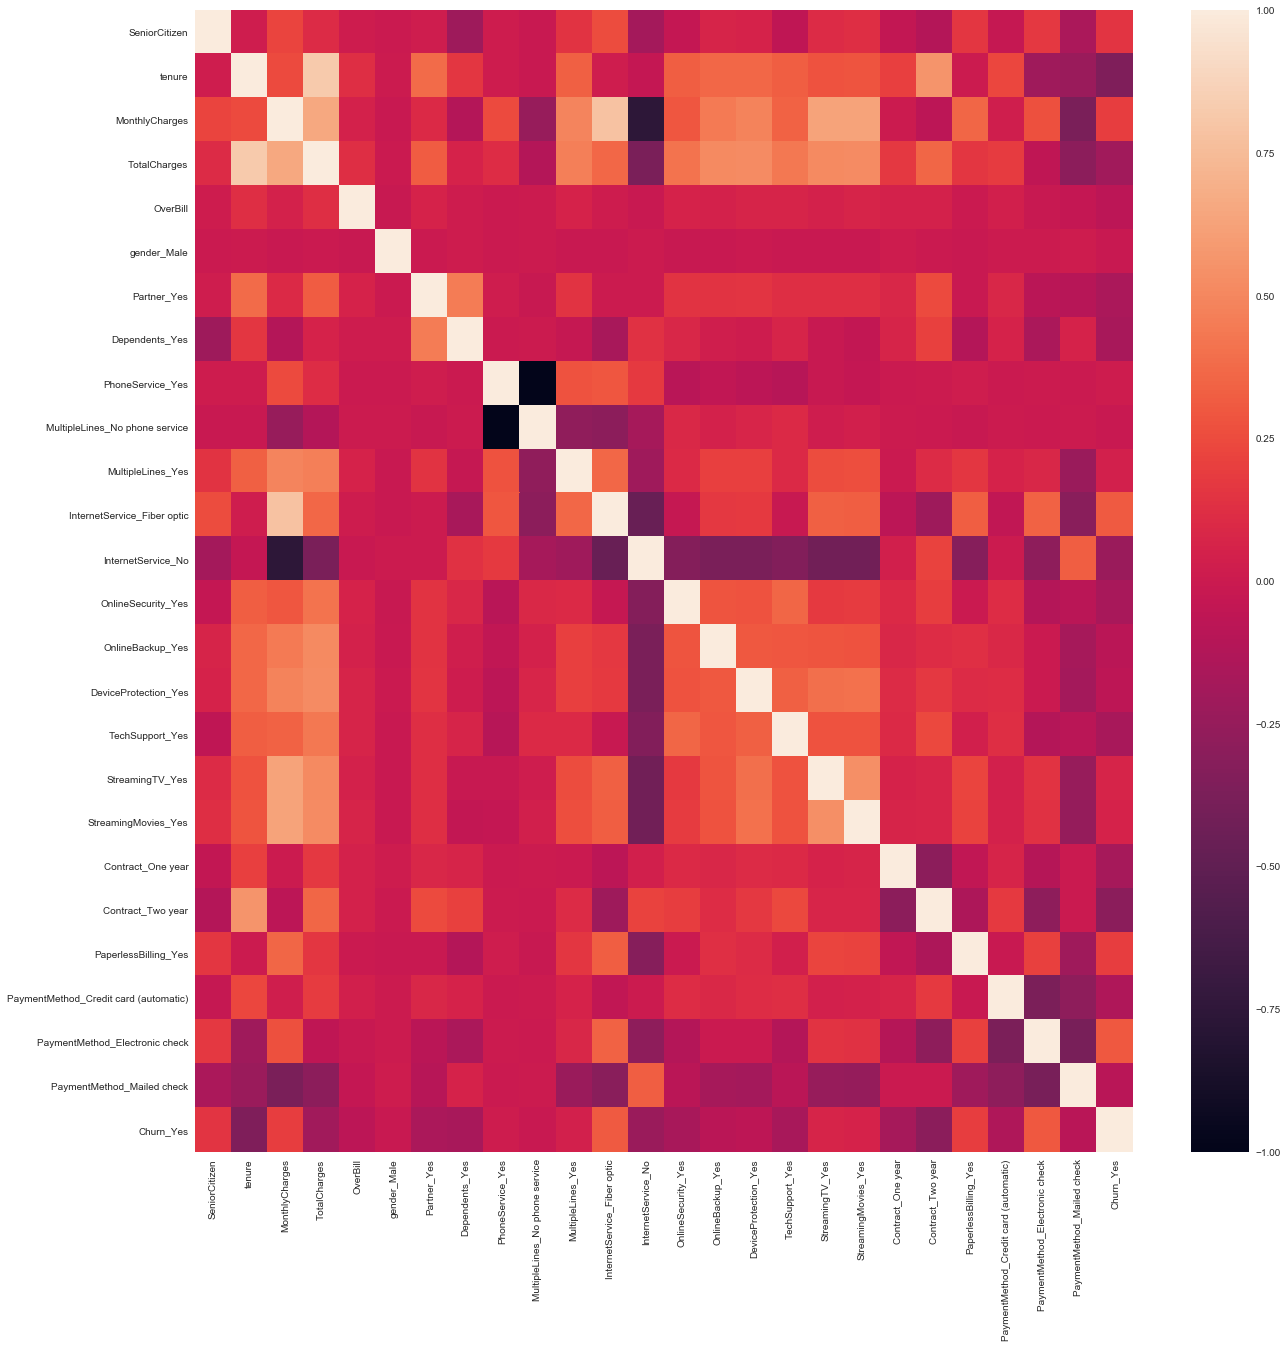

In [74]:
plt.figure(figsize=(21, 21))
sns.heatmap(churn.corr())

In [75]:
churn.corr()["PhoneService_Yes"].sort_values(ascending=False)

PhoneService_Yes                         1.000000
InternetService_Fiber optic              0.289999
MultipleLines_Yes                        0.279690
MonthlyCharges                           0.247398
InternetService_No                       0.172209
TotalCharges                             0.113214
Partner_Yes                              0.017706
PaperlessBilling_Yes                     0.016505
Churn_Yes                                0.011942
SeniorCitizen                            0.008576
tenure                                   0.008448
Contract_Two year                        0.003519
PaymentMethod_Electronic check           0.003062
Dependents_Yes                          -0.001762
OverBill                                -0.002646
Contract_One year                       -0.002791
PaymentMethod_Mailed check              -0.003319
gender_Male                             -0.006488
PaymentMethod_Credit card (automatic)   -0.007721
StreamingTV_Yes                         -0.022574


In [76]:
# PhoneService_Yes and MultipleLines_No phone service columns -1.0 correlation. This can cause multicollinearity.
churn.drop(["MultipleLines_No phone service"], axis=1, inplace=True)

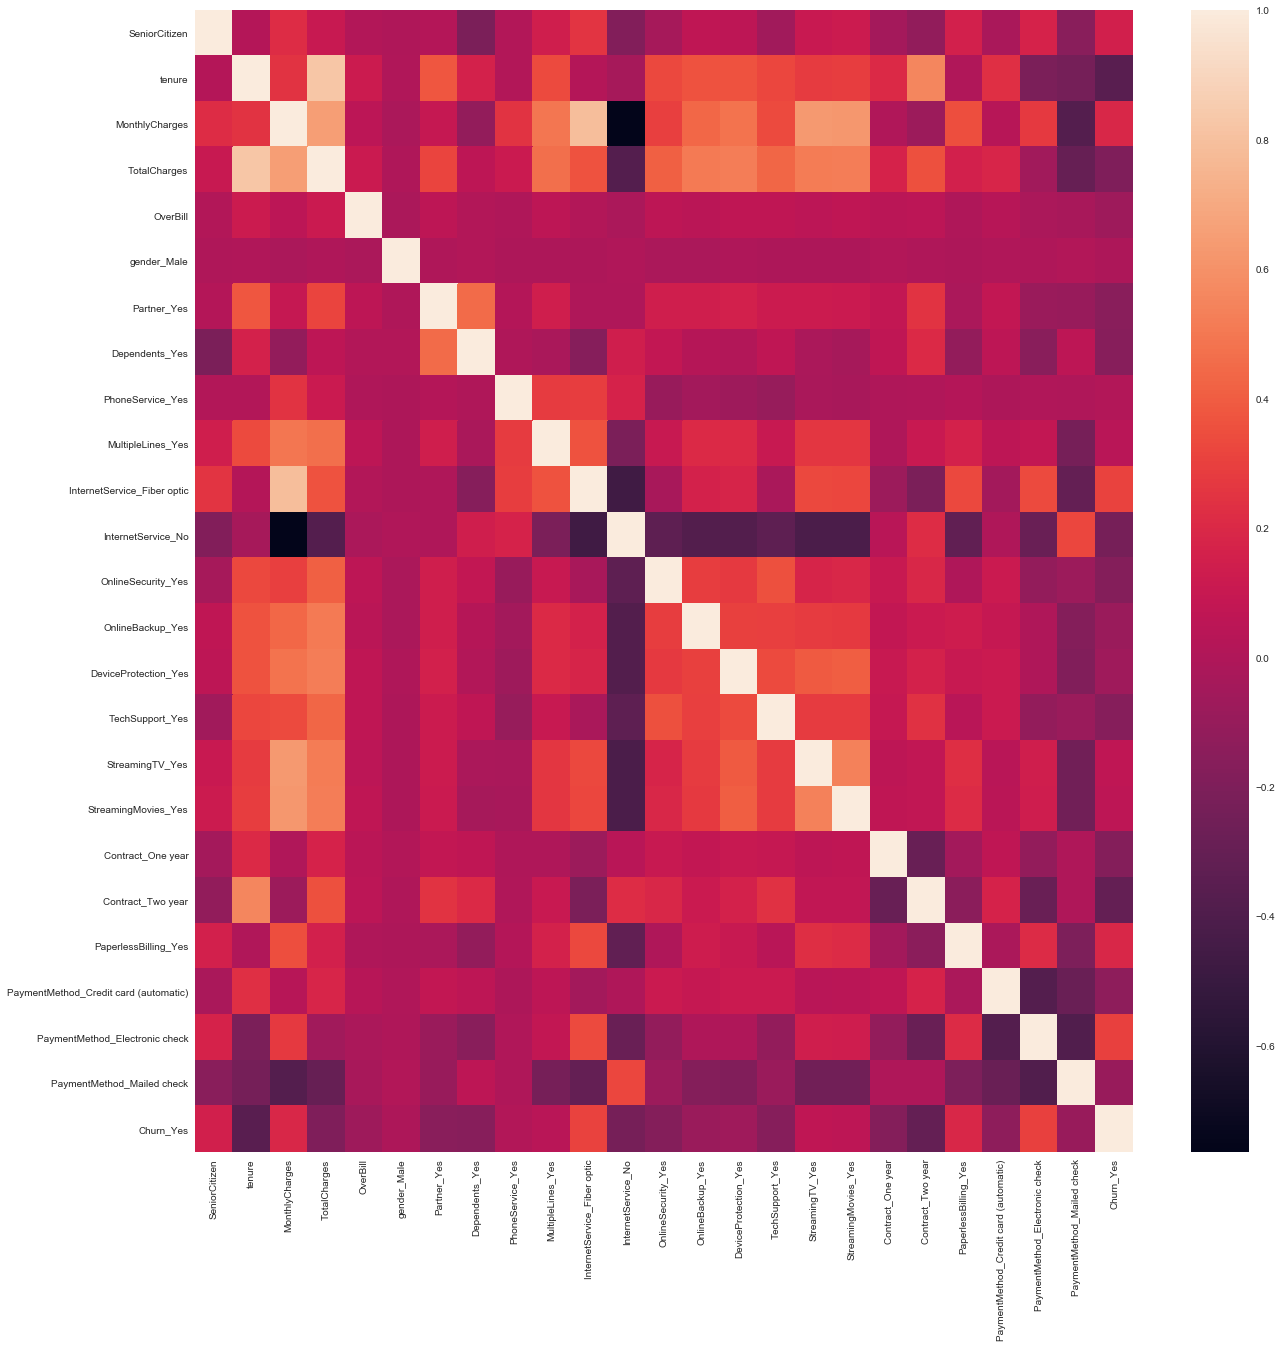

In [77]:
plt.figure(figsize=(21, 21))
sns.heatmap(churn.corr())

In [78]:
churn.corr()["Churn_Yes"].sort_values(ascending=False)

Churn_Yes                                1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
DeviceProtection_Yes                    -0.066160
OverBill                                -0.072486
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


### Machine Learning

In [79]:
X = churn.drop("Churn_Yes", axis=1)

y = churn["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Smote creates synthetic data for handling imbalanced datasets.
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [81]:
print(len(X_train))
print(len(y_train))

8276
8276


##### Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.57      0.70      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.78      0.79      1409



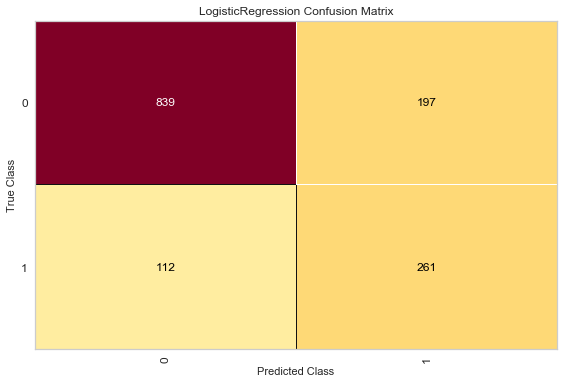

In [82]:
log_model = LogisticRegression().fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))

#Yellowbrick Visualization
log_cm = ConfusionMatrix(log_model)
log_cm.fit(X_train, y_train)
log_cm.score(X_test, y_test)
log_cm.show()   

In [83]:
log_params = {"penalty":["none", "l1", "l2","elasticnet"],
              "C":[0.01, 0.1,1,3, 10],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

In [84]:
log_grid = RandomizedSearchCV(LogisticRegression(), param_distributions=log_params, n_jobs=-1, cv=10, n_iter=100).fit(X_train, y_train)

In [85]:
log_grid.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.01}

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1036
           1       0.59      0.68      0.63       373

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



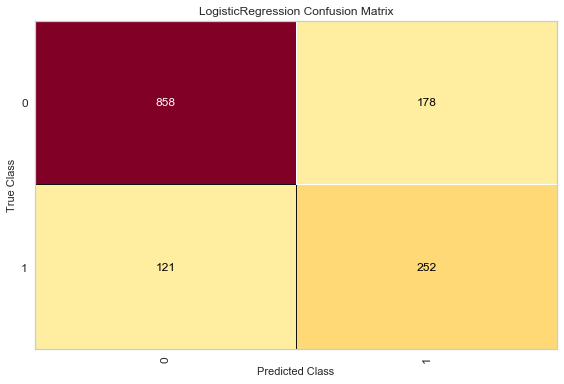

In [87]:
log_tuned = LogisticRegression(solver="newton-cg", penalty="none", C=0.01).fit(X_train, y_train)
y_pred_log_tuned = log_tuned.predict(X_test)
print(classification_report(y_test, y_pred_log_tuned))

#Yellowbrick Visualization
log_tuned_cm = ConfusionMatrix(log_tuned)
log_tuned_cm.fit(X_train, y_train)
log_tuned_cm.score(X_test, y_test)
log_tuned_cm.show()   

##### Decision Tree

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1036
           1       0.51      0.57      0.54       373

    accuracy                           0.74      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.75      0.74      0.75      1409



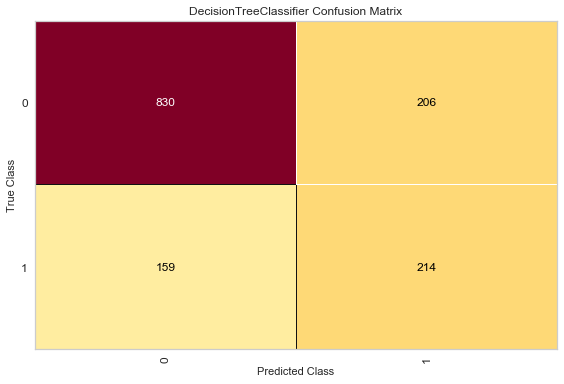

In [88]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print(classification_report(y_test, y_pred_dtree))

#Yellowbrick Visualization
dtree_cm = ConfusionMatrix(dtree)
dtree_cm.fit(X_train, y_train)
dtree_cm.score(X_test, y_test)
dtree_cm.show()

In [89]:
dtree_params = {"criterion":["gini", "entropy"],
                "splitter":["best", "random"],
                "max_features": ["auto", "sqrt", "log2"],
                "min_samples_split":[1,2,3],
                "max_depth": [10,30,50],
                "min_samples_leaf" : [1,2,3]
                  }

In [90]:
dtree_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=dtree_params, cv=10, n_jobs=-1, n_iter=100).fit(X_train, y_train)

In [91]:
dtree_grid.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1036
           1       0.51      0.67      0.58       373

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.74      0.75      1409



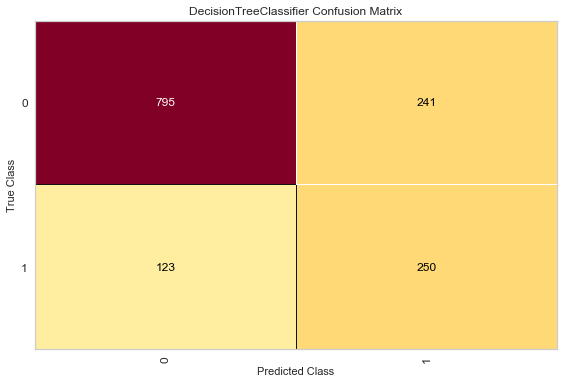

In [92]:
dtree_tuned = DecisionTreeClassifier(splitter="best", criterion="gini", min_samples_split=3, max_depth=10, max_features="auto", min_samples_leaf=2)
dtree_tuned.fit(X_train, y_train)
y_pred_dtree_tuned = dtree_tuned.predict(X_test)
print(classification_report(y_test, y_pred_dtree_tuned))

#Yellowbrick Visualization
dtree_tuned_cm = ConfusionMatrix(dtree_tuned)
dtree_tuned_cm.fit(X_train, y_train)
dtree_tuned_cm.score(X_test, y_test)
dtree_tuned_cm.show()    

##### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.58      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



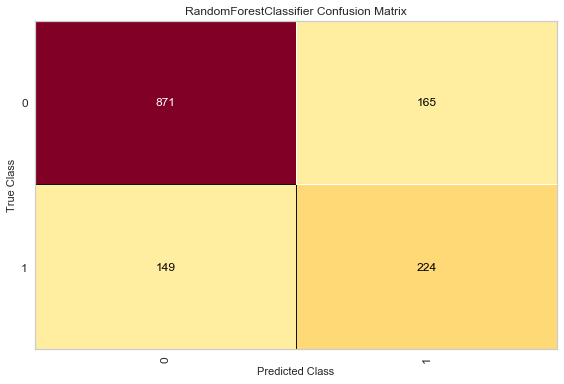

In [93]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

#Yellowbrick Visualization
rfc_cm = ConfusionMatrix(rfc)
rfc_cm.fit(X_train, y_train)
rfc_cm.score(X_test, y_test)
rfc_cm.show()   

In [94]:
rfc_params = {"n_estimators":[100,300,500,1000],
              "criterion":["gini", "entropy"],
              "max_depth": [10,30,50],
              "min_samples_split":[1,2,3],
              "min_samples_leaf":[1,2,3],
              "max_features":["auto", "sqrt", "log2"]}

In [95]:
rfc_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_params, cv=10, n_jobs=-1, n_iter=100).fit(X_train, y_train)

In [96]:
rfc_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'entropy'}

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.58      0.65      0.62       373

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



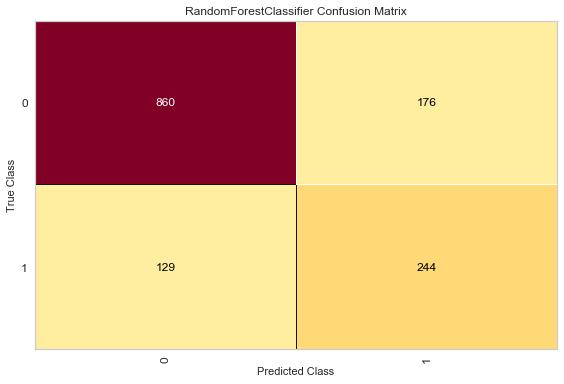

In [97]:
rfc_tuned = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, 
                                   min_samples_leaf=2, max_features="log2", criterion="entropy")
rfc_tuned.fit(X_train, y_train)
y_pred_rfc_tuned = rfc_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rfc_tuned))

#Yellowbrick Visualization
rfc_tuned_cm = ConfusionMatrix(rfc_tuned)
rfc_tuned_cm.fit(X_train, y_train)
rfc_tuned_cm.score(X_test, y_test)
rfc_tuned_cm.show()    

##### XGBOOST CLASSIFIER

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.60      0.59      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



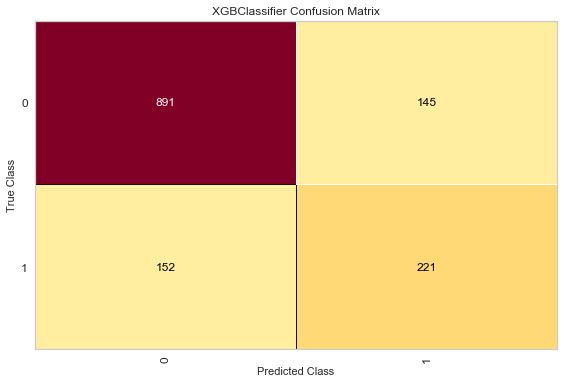

In [98]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

#Yellowbrick Visualization
xgb_cm = ConfusionMatrix(xgb)
xgb_cm.fit(X_train, y_train)
xgb_cm.score(X_test, y_test)
xgb_cm.show()  

In [100]:
xgb_params = {"n_estimators":[300,500, 1000],
              "learning_rate": [0.01, 0.1,0.5, 1, 2],
              "max_depth": [3, 5, 7, 10],
              "gamma":[0.1, 1, 3],
              "subsample":[0.5, 0.8, 1,3],
              "colsample_bytree":[0.3,0.5, 0.8, 1]}

In [101]:
xgb_grid = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_params, cv=10,n_jobs=-1, n_iter=100).fit(X_train, y_train)

In [102]:
xgb_grid.best_params_

{'subsample': 0.5,
 'n_estimators': 1000,
 'max_depth': 10,
 'learning_rate': 0.01,
 'gamma': 1,
 'colsample_bytree': 0.8}

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.58      0.76      0.66       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.76      1409
weighted avg       0.82      0.79      0.80      1409



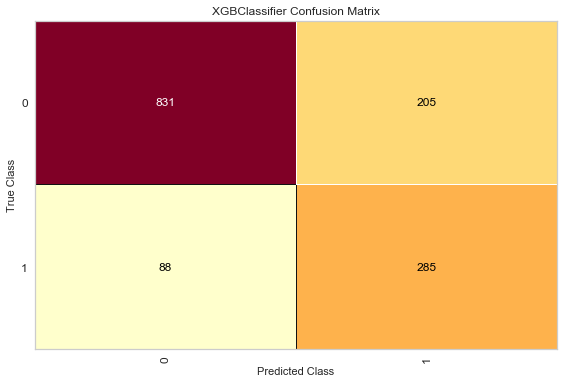

In [110]:
xgb_tuned = XGBClassifier(n_estimators=1000, learning_rate=0.001, max_depth=15, gamma=10, colsample_bytree=0.5, subsample=0.8)
xgb_tuned.fit(X_train, y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
print(classification_report(y_test, y_pred_xgb_tuned))

#Yellowbrick Visualization
xgb_tuned_cm = ConfusionMatrix(xgb_tuned)
xgb_tuned_cm.fit(X_train, y_train)
xgb_tuned_cm.score(X_test, y_test)
xgb_tuned_cm.show()   

##### K NEAREST NEIGHBOR

In [111]:
scale = StandardScaler()
scale.fit(churn.drop("Churn_Yes", axis=1))
x_scaled = scale.transform(churn.drop("Churn_Yes", axis=1))
churn_scaled = pd.DataFrame(x_scaled, columns=churn.columns[:-1])

X = churn_scaled
y = churn["Churn_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.54      0.56       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



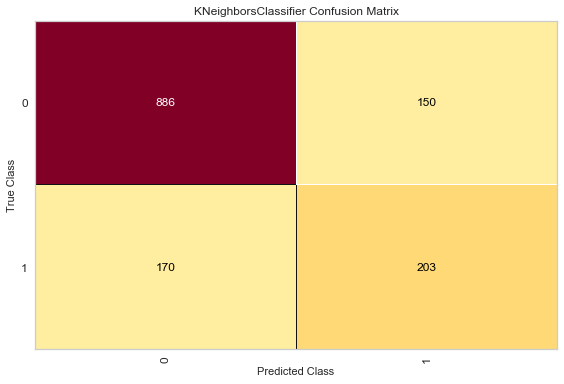

In [112]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

#Yellowbrick Visualization
knn_cm = ConfusionMatrix(knn)
knn_cm.fit(X_train, y_train)
knn_cm.score(X_test, y_test)
knn_cm.show()   

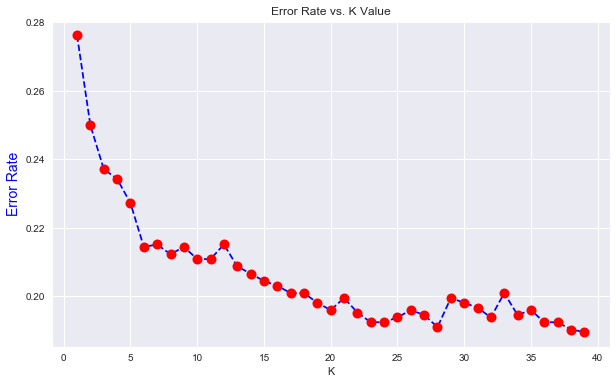

In [113]:
error_rate = list()

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate', c="blue", size=14)
plt.show()

In [114]:
knn_params = {"n_neighbors":list(range(10,40)),
              "leaf_size":[10,30,50,70],
              "p":[1,2]}

In [115]:
knn_grid = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=knn_params, n_jobs=-1, n_iter=100).fit(X_train, y_train)

In [116]:
knn_grid.best_params_

{'p': 1, 'n_neighbors': 36, 'leaf_size': 30}

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



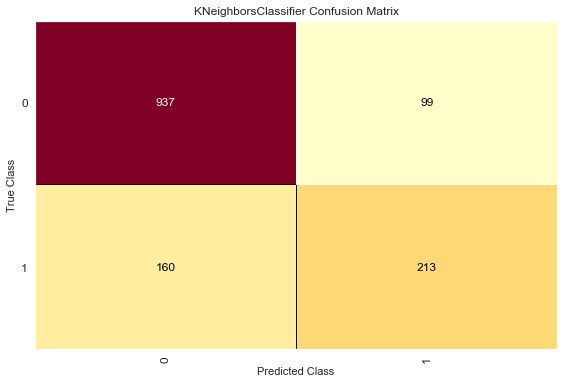

In [120]:
knn_tuned = KNeighborsClassifier(n_neighbors=36, leaf_size=30, p=1)
knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = knn_tuned.predict(X_test)
print(classification_report(y_test, y_pred_knn_tuned))

#Yellowbrick Visualization
knn_tuned_cm = ConfusionMatrix(knn_tuned)
knn_tuned_cm.fit(X_train, y_train)
knn_tuned_cm.score(X_test, y_test)
knn_tuned_cm.show()   

##### Support Vector Machine

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



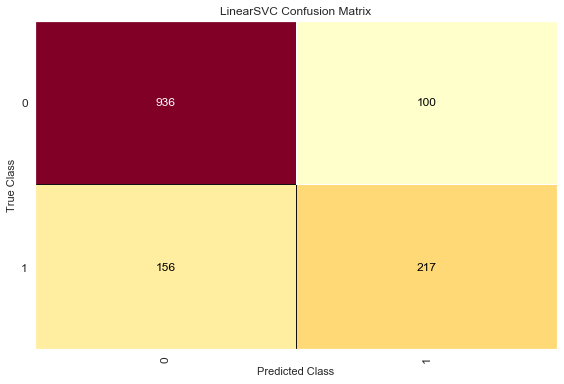

In [121]:
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
y_pred_linearsvc = linearsvc.predict(X_test)
print(classification_report(y_test, y_pred_linearsvc))

#Yellowbrick Visualization
linearsvc_cm = ConfusionMatrix(linearsvc)
linearsvc_cm.fit(X_train, y_train)
linearsvc_cm.score(X_test, y_test)
linearsvc_cm.show()   

In [122]:
linearsvc_params = {"penalty":["l1", "l2"],
              "loss":["hinge", "squared_hinge"],
              "max_iter": [500, 1000, 1500],
              "C": [0.1,0.5,1,3,5],
              "multi_class":["ovr", "crammer_singer"],
              }

In [123]:
linearsvc_grid = RandomizedSearchCV(LinearSVC(), param_distributions=linearsvc_params, cv=10, n_jobs=-1, n_iter=100).fit(X_train, y_train)

In [125]:
linearsvc_grid.best_params_

{'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 1500,
 'loss': 'squared_hinge',
 'C': 5}

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



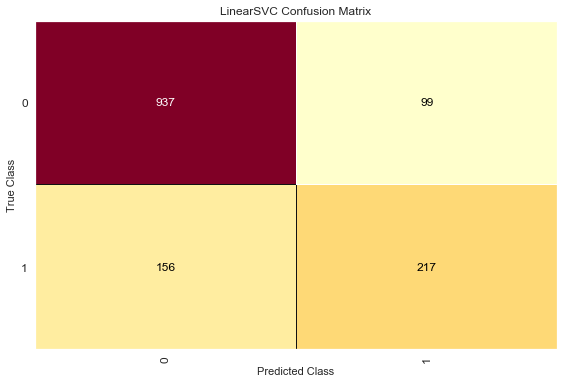

In [136]:
linearsvc_tuned = LinearSVC(C=5, max_iter=1500, multi_class="ovr", penalty="l2", loss="squared_hinge")
linearsvc_tuned.fit(X_train, y_train)
y_pred_linearsvc_tuned = linearsvc_tuned.predict(X_test)
print(classification_report(y_test, y_pred_linearsvc_tuned))

#Yellowbrick Visualization
linearsvc_tuned_cm = ConfusionMatrix(linearsvc_tuned)
linearsvc_tuned_cm.fit(X_train, y_train)
linearsvc_tuned_cm.score(X_test, y_test)
linearsvc_tuned_cm.show()  

##### Ridge Classifier

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



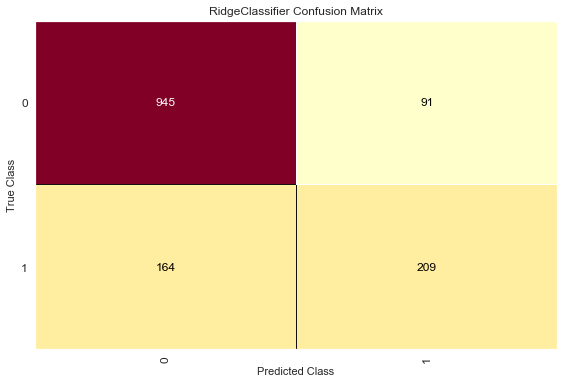

In [137]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(classification_report(y_test, y_pred_ridge))

#Yellowbrick Visualization
ridge_cm = ConfusionMatrix(ridge)
ridge_cm.fit(X_train, y_train)
ridge_cm.score(X_test, y_test)
ridge_cm.show()   

In [138]:
ridge_params = {"alpha":[0.01,0.1, 0.5, 1.0, 3, 5, 10],
                "max_iter":[500, 1000, 1500],
                "solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}

In [139]:
ridge_grid = RandomizedSearchCV(RidgeClassifier(), param_distributions=ridge_params, cv=10, n_jobs=-1, n_iter=100).fit(X_train, y_train)

In [140]:
ridge_grid.best_params_

{'solver': 'sparse_cg', 'max_iter': 500, 'alpha': 3}

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.70      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



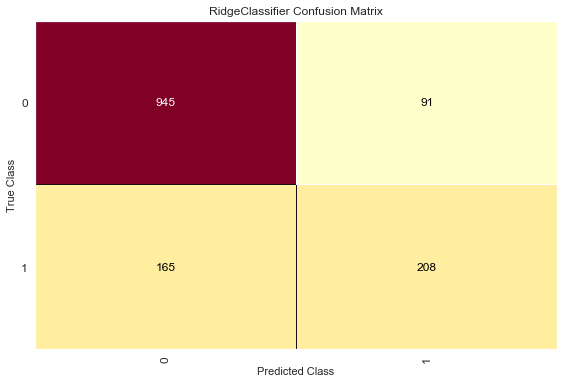

In [145]:
ridge_tuned = RidgeClassifier(alpha=3, max_iter=500 , solver="sparse_cg")
ridge_tuned.fit(X_train, y_train)
y_pred_ridge_tuned = ridge_tuned.predict(X_test)
print(classification_report(y_test, y_pred_ridge_tuned))

#Yellowbrick Visualization
ridge_tuned_cm = ConfusionMatrix(ridge_tuned)
ridge_tuned_cm.fit(X_train, y_train)
ridge_tuned_cm.score(X_test, y_test)
ridge_tuned_cm.show()

## F1 Score Comparison

In [146]:
X = churn.drop("Churn_Yes", axis=1)

y = churn["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
logistic_reg_f1 = f1_score(y_test, y_pred_log_tuned)
dtree_f1 = f1_score(y_test, y_pred_dtree_tuned)
random_for_f1 = f1_score(y_test, y_pred_rfc_tuned)
xgb_f1 = f1_score(y_test, y_pred_xgb_tuned)

In [148]:
scale = StandardScaler()
scale.fit(churn.drop("Churn_Yes", axis=1))
x_scaled = scale.transform(churn.drop("Churn_Yes", axis=1))
churn_scaled = pd.DataFrame(x_scaled, columns=churn.columns[:-1])

X = churn_scaled
y = churn["Churn_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
knn_f1 = f1_score(y_test, y_pred_knn_tuned)
linearsvc_f1 = f1_score(y_test, y_pred_linearsvc_tuned)
ridge_f1  = f1_score(y_test, y_pred_ridge_tuned)

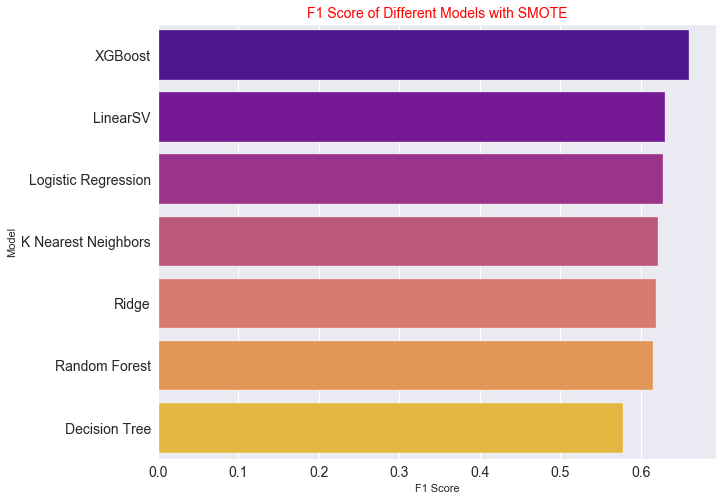

In [150]:
graph = pd.DataFrame({"Model":["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "K Nearest Neighbors", "LinearSV", "Ridge"],
                      "F1 Score":[logistic_reg_f1, dtree_f1, random_for_f1, xgb_f1, knn_f1, linearsvc_f1, ridge_f1]})
graph = graph.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x="F1 Score", y="Model", data=graph, palette="plasma")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models with SMOTE", size=14, c="red");